# Diffusion in a 2D domain with Traps

Cem Berke Arslan

Date: 14/11/2024

## Aim of the Project:

Investigate of a diffusion of a particle in a 2D domain with traps. Explore how the mean square displacement (MSD) of the particle changes over time as a function of trap density and the trapping time parameter λ (lambda), which represents the average trapping time relative to the characteristic time of free diffusion.



## Methodology

Simulation of Diffusion in a 2D Domain with Traps:

  1) Random Walk Algorithm Implementation:
Simulate the random motion of particles on a 2D square lattice of size M × M
At each time step, particles move to one of their four neighboring sites (up, down, left, right) with equal probability.
Implement periodic boundary conditions to eliminate edge effects.

  2) Incorporation of Trapping Times
  
To place traps: Randomly distribute traps on the lattice based on a specified trap density 𝜌 (fraction of sites that are traps).
Ensure that particles do not start on a trap site. The trapping mechanism functions when the particle lands on said trap, the particle becomes immobilized for a time drawn from an exponential distribtuion with mean trapping time τ = λδt. After the time elapses, the particle resumes its random walk.

  3) Data Collection:

Simulate N particles. Compute and record the square displacement of each partlice from its starting position at each time step. Repeate simulations for  various trap densities (p = 0.0, 0.1, 0.2, 0.3) and lambda values (𝜆 = 0.1, 1, 10)

  4) Analysis and Visualization:

Calculate mean square displacement as a function of time for different trap densities and lambda values. Determine fraction of particles that are not trapped at each time step. Plot MSD (mean square displacement) vs. time for different parameters to observe the diffusion behavior. Explore how trap density and lambda value affect the diffusion process.







____________________________________________________________________________________________________________


## Results

### Simulation of the Diffusion Process:

Successfully implemented the random walk simulation with trapping events. Particles exhibited normal diffusion in the absence of traps           (𝜌 = 0.0), confirming the validity of the simulation

### Impact of Traps on Diffusion:

Increased trap density led to more frequent trapping events, and an overall reduced particle mobility. It also caused a slower mean square distance growth over time. Larger lambda values (longer average trapping times) caused more significant delays in particle movement. These two combined exponentially to reduce general particle mobility and square distances given time.

### Analysis and Visualization

#### Mean Square Displacement vs. Time: 
* Without traps (ρ = 0.0): MSD grew linearly with time, characteristic of normal diffusion. (MSD ∝ t)
* With traps: MSD growth slowed down, higher trap densities and larger lambda values causeda sublinear MSD growth, indicating anomalous diffusion. 

#### Trapping Density ρ: 
* With low trap density (ρ = 0.1) MSD showed only slight deviations from linearity. Normal diffusion behaviour was largerly maintained among particles. 
* With high trap density (ρ = 0.3) MSD growth reduced significantly. Particles frequently were trapped and linearity could not be maintained. 

#### Trapping Time Parameter λ: 

* small λ (λ = 0.1): Short trapping times minized impact on MSD, even with a higher trapping density (ρ = 0.2). Diffusion was maintained the same as the case of low trapping density. 
* Large λ (λ = 10): Caused long trapping times, MSD exhibiting strong sublinear behaviour. Survival probability decreased more rapidly with higher trap densities and larger λ values, immobilized particles were observed susceptible to lower survival rates.

The project successfully demonstrated how traps with varying densities and trapping times influence the diffusion of particles in a 2D domain. By incorporating trapping events into the random walk simulation, we observed a transition from normal to anomalous diffusion as trap density and λ increased.

References:

Mora, S., et al. (2018). Diffusion of a tracer particle in a two-dimensional lattice gas. Physical Review E.

### Simulation Parameters

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 


In [9]:
M = 100
Num_Particles = 1000
T_steps = 500
rho_list = [0.0,0.1,0.2,0.3]
lambda_list = [0.1,1,10]


D = 1.0                 
delta_t = 1.0           
delta_x = np.sqrt(2 * D * delta_t)


### Trap Generation

In [5]:
def generate_traps(M, rho):
    traps = np.random.choice([0, 1], size=(M, M), p=[1 - rho, rho])
    return traps

### Diffusion Simulation

In [6]:
def simulate_diffusion(L, N_particles, T, traps, λ):
    sq_displacements = np.zeros((N_particles, T))
    trapping_times = np.zeros(N_particles)        
    positions = np.zeros((N_particles, 2), dtype=int)
    for i in range(N_particles):
        while True:
            pos = np.random.randint(0, L, size=2)
            if traps[pos[0], pos[1]] == 0:
                positions[i] = pos
                break

    initial_positions = positions.copy()

    msd = np.zeros(T)
    survival_prob = np.zeros(T)

    for t in range(T):
        active_particles = 0
        for i in range(N_particles):
            if trapping_times[i] > 0:
                trapping_times[i] -= delta_t
                if trapping_times[i] <= 0:
                    trapping_times[i] = 0
                continue  
            else:
                move = np.random.choice(['up', 'down', 'left', 'right'])
                if move == 'up':
                    positions[i][0] = (positions[i][0] + 1) % L
                elif move == 'down':
                    positions[i][0] = (positions[i][0] - 1) % L
                elif move == 'right':
                    positions[i][1] = (positions[i][1] + 1) % L
                elif move == 'left':
                    positions[i][1] = (positions[i][1] - 1) % L

                if traps[positions[i][0], positions[i][1]] == 1:
                    τ = λ * delta_t  
                    trapping_time = np.random.exponential(scale=τ)
                    trapping_times[i] = trapping_time

            displacement = positions[i] - initial_positions[i]
            sq_distance = displacement[0]**2 + displacement[1]**2
            sq_displacements[i, t] = sq_distance * (delta_x**2)
            active_particles += 1

        msd[t] = np.mean(sq_displacements[:, t])

        num_trapped = np.sum(trapping_times > 0)
        survival_prob[t] = (N_particles - num_trapped) / N_particles

    return msd, survival_prob


In [13]:
results = {}


for rho in rho_list:
    traps = generate_traps(M, rho)
    for λ in lambda_list:
        print(f"Running simulation for ρ={rho}, λ={λ}...")
        msd, survival_prob = simulate_diffusion(M, Num_Particles, T_steps, traps, λ)
        key = f"rho_{rho}_lambda_{λ}"
        results[key] = {'msd': msd, 'survival_prob': survival_prob}


Running simulation for ρ=0.0, λ=0.1...
Running simulation for ρ=0.0, λ=1...
Running simulation for ρ=0.0, λ=10...
Running simulation for ρ=0.1, λ=0.1...
Running simulation for ρ=0.1, λ=1...
Running simulation for ρ=0.1, λ=10...
Running simulation for ρ=0.2, λ=0.1...
Running simulation for ρ=0.2, λ=1...
Running simulation for ρ=0.2, λ=10...
Running simulation for ρ=0.3, λ=0.1...
Running simulation for ρ=0.3, λ=1...
Running simulation for ρ=0.3, λ=10...


Plotting Mean Square Displacement

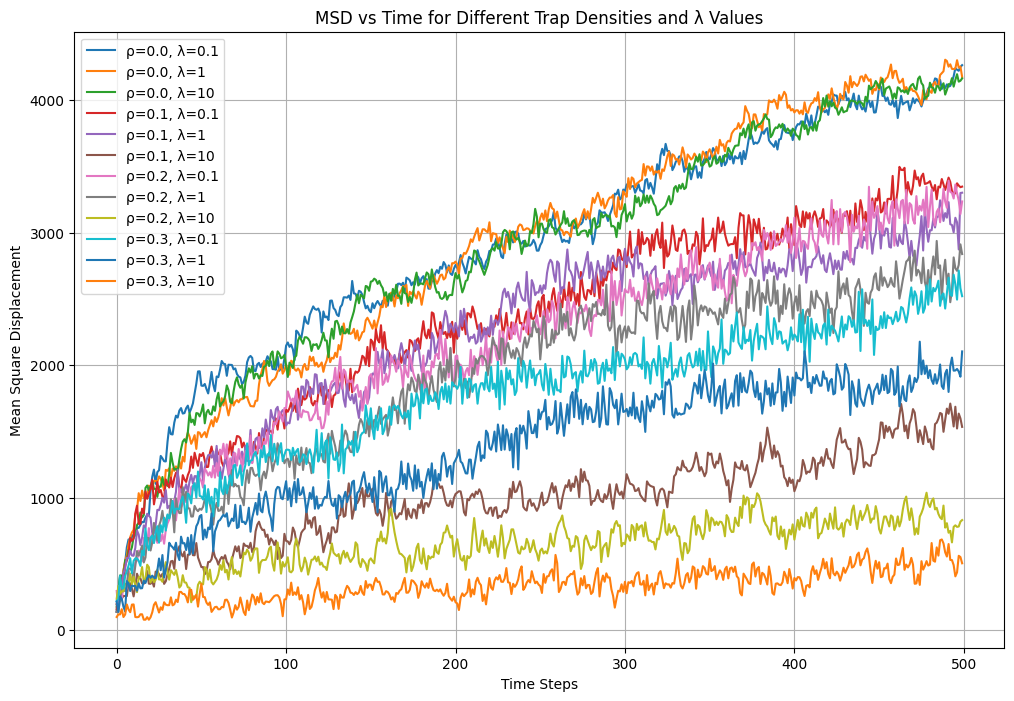

In [14]:
# Plotting MSD vs Time for different trap densities and λ values

plt.figure(figsize=(12, 8))
for rho in rho_list:
    for λ in lambda_list:
        key = f"rho_{rho}_lambda_{λ}"
        msd = results[key]['msd']
        plt.plot(range(T_steps), msd, label=f'ρ={rho}, λ={λ}')

plt.xlabel('Time Steps')
plt.ylabel('Mean Square Displacement')
plt.title('MSD vs Time for Different Trap Densities and λ Values')
plt.legend()
plt.grid(True)
plt.show()


Plotting Survival Probability

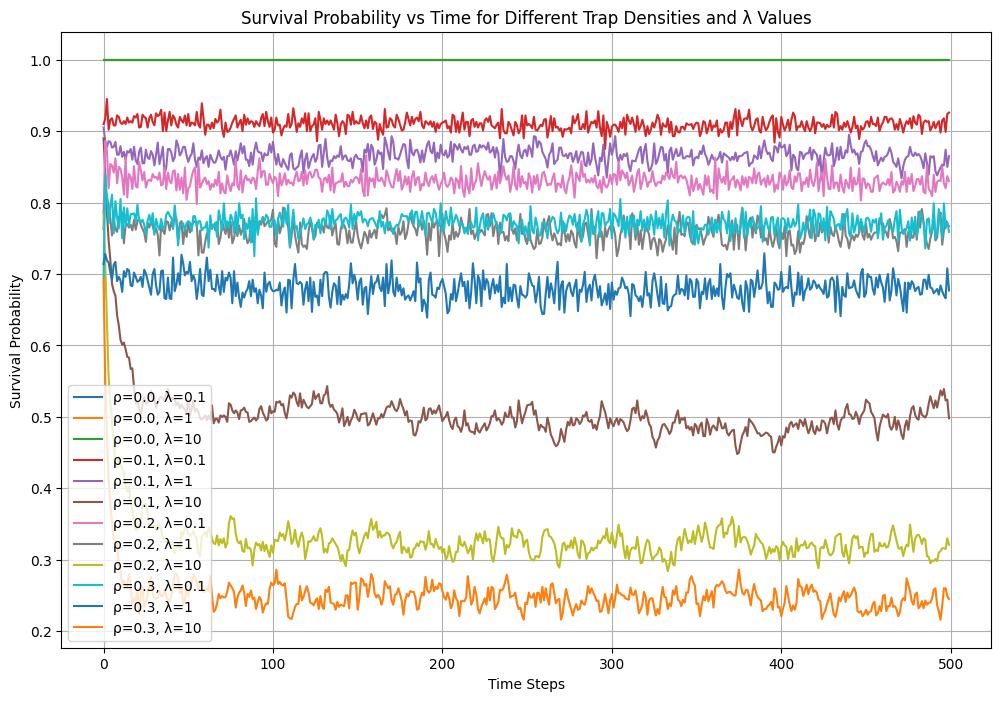

In [16]:
# Plotting Survival Probability vs Time

plt.figure(figsize=(12, 8))
for rho in rho_list:
    for λ in lambda_list:
        key = f"rho_{rho}_lambda_{λ}"
        survival_prob = results[key]['survival_prob']
        plt.plot(range(T_steps), survival_prob, label=f'ρ={rho}, λ={λ}')

plt.xlabel('Time Steps')
plt.ylabel('Survival Probability')
plt.title('Survival Probability vs Time for Different Trap Densities and λ Values')
plt.legend()
plt.grid(True)
plt.show()


The plot above shows the average Mean Square Displacement (MSD) as a function of time steps (t) for different trapping densities (ρ) and trapping times (λ), divided by differing colors.

At high trapping densities

Fitted parameters for ρ=0.3, λ=10:
Effective Diffusion Coefficient (D_eff): 9.717388616353476
Diffusion Exponent (alpha): 0.40265515445137734


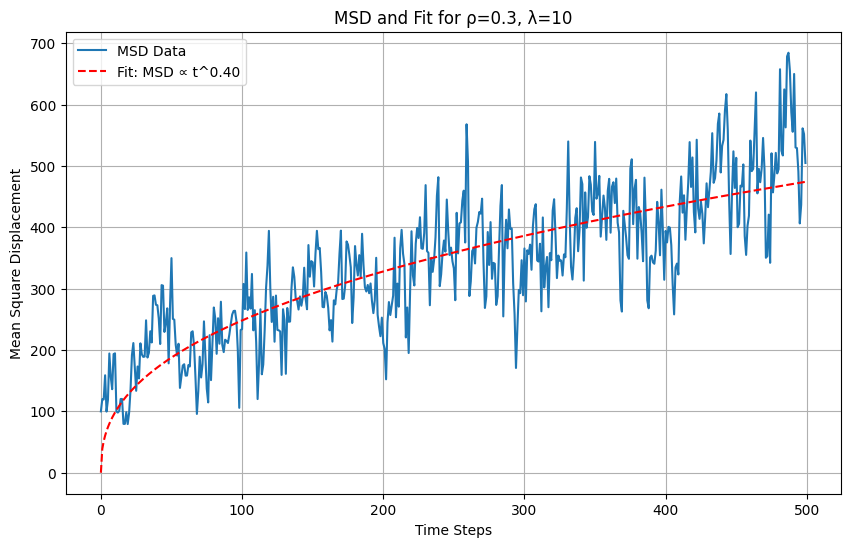

In [17]:
from scipy.optimize import curve_fit

def msd_func(t, D_eff, alpha):
    return 4 * D_eff * t**alpha

# Analyze MSD for a specific case
rho = 0.3
λ = 10
key = f"rho_{rho}_lambda_{λ}"
msd = results[key]['msd']
time = np.arange(T_steps)

# Fit the MSD data
popt, pcov = curve_fit(msd_func, time[1:], msd[1:])  # Exclude t=0 to avoid zero

D_eff, alpha = popt
print(f"Fitted parameters for ρ={rho}, λ={λ}:")
print(f"Effective Diffusion Coefficient (D_eff): {D_eff}")
print(f"Diffusion Exponent (alpha): {alpha}")

# Plot the MSD with fit
plt.figure(figsize=(10, 6))
plt.plot(time, msd, label='MSD Data')
plt.plot(time, msd_func(time, *popt), 'r--', label=f'Fit: MSD ∝ t^{alpha:.2f}')
plt.xlabel('Time Steps')
plt.ylabel('Mean Square Displacement')
plt.title(f'MSD and Fit for ρ={rho}, λ={λ}')
plt.legend()
plt.grid(True)
plt.show()
